In [3]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

# Step 1: Generate synthetic data
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)

# Step 2: Define the negative log-likelihood function
def neg_log_likelihood(params, data):
    mu, sigma = params
    n = len(data)
    return -np.sum(norm.logpdf(data, loc=mu, scale=sigma))

# Initial guesses for the parameters
initial_params = [0, 1]

# Step 3: Use an optimization method to minimize the negative log-likelihood
result = minimize(neg_log_likelihood, initial_params, args=(data,), method='L-BFGS-B',
                  bounds=[(None, None), (1e-5, None)])

mu_mle, sigma_mle = result.x

print(f"MLE for mean (mu): {mu_mle}")
print(f"MLE for standard deviation (sigma): {sigma_mle}")


MLE for mean (mu): 4.792306032104664
MLE for standard deviation (sigma): 1.8072322316309144


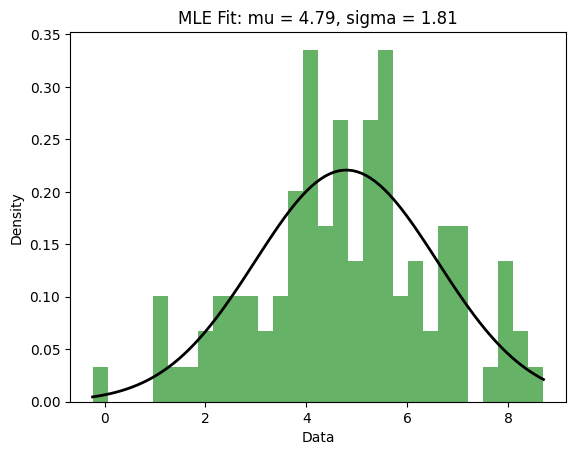

In [2]:
import matplotlib.pyplot as plt

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF with the estimated parameters
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, loc=mu_mle, scale=sigma_mle)
plt.plot(x, pdf, 'k', linewidth=2)
plt.title(f"MLE Fit: mu = {mu_mle:.2f}, sigma = {sigma_mle:.2f}")
plt.xlabel('Data')
plt.ylabel('Density')
plt.show()
